In [12]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
#use dataset with
location = "downloads/kmeansdata5.csv"
df = pd.read_csv(location)

#in this dataframe, features 1 & 2 are the characteristics of each data point (predictive features) 
#C is the target variable (categories to predict)
df

,feature1,feature2,category
0,9,69,0
1,17,79,0
2,24,56,0
3,36,68,0
4,41,53,0
5,45,86,0
6,74,85,1
7,80,63,1
8,81,68,1
9,92,86,1


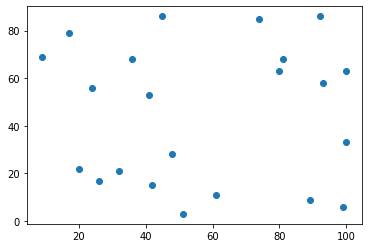

In [14]:
#plot data points to visually see where they are
#on small and distinctive dataset, easier to see clusters
plt.scatter(df['feature1'],df['feature2'])

In [15]:
#make a dataframe called X to hold the predictive features
X = df.drop('category', axis=1)
X.head()

,feature1,feature2
0,9,69
1,17,79
2,24,56
3,36,68
4,41,53


In [16]:
#dataframe of one column
#holds target variable "category"
y = df['category'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: category, dtype: int64

In [17]:
#initialize k-means function
#set number of clusters to categorize = 4
kmeans = KMeans(n_clusters=4)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
#data point coordinates for centroids of each cluster
#index 0 is blue cluster
#index 1 is yellow cluster
#index 2 is purple cluster
#index 3 is red cluster
print(kmeans.cluster_centers_)

[[28.66666667 68.5       ]
 [96.         16.        ]
 [86.66666667 70.5       ]
 [40.         16.71428571]]


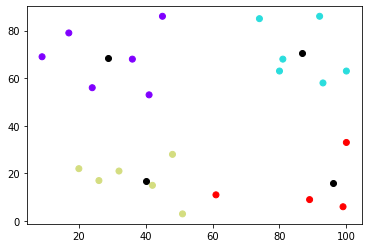

In [19]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df['feature1'],df['feature2'], c=df['category'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [20]:
#add a new column to dataframe called "cluster"
#can use this to compare features of clusters to original categories
df['cluster'] = kmeans.labels_

In [21]:
#dataframe with new cluster column
df.head()

,feature1,feature2,category,cluster
0,9,69,0,0
1,17,79,0,0
2,24,56,0,0
3,36,68,0,0
4,41,53,0,0


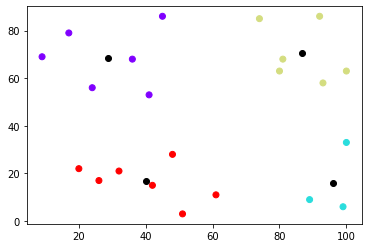

In [23]:
#scatterplot of k-means predicted clusters with calculated centroids

#k-means predicted clusters for the original data features
plt.scatter(df['feature1'],df['feature2'], c=df['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [24]:
#predict category of new data point
kpred = [50,50]

#model thinks new data point belongs to upper-left cluster
print(kmeans.predict([kpred]))

[0]


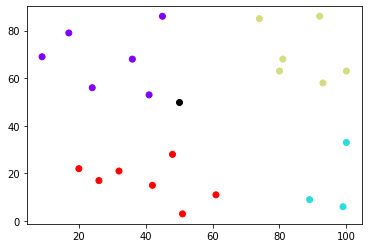

In [25]:
#see plot of new data point

#k-means predicted clusters (in color) for the data points
plt.scatter(df['feature1'],df['feature2'], c=df['cluster'], cmap= 'rainbow')

#new data point is the black dot
plt.scatter(kpred[0],kpred[1],c='black')